In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
#missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
#check duplicates
df.duplicated().sum()

0

In [9]:
#check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
#checking no. of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
#check statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


ABOVE ARE THE INSIGHTS 

***Exploring Data***

In [12]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [13]:
print("Cateogries in 'gender' variable :    ",end=" ")
print(df['gender'].unique())

print("Cateogries in 'race_ethnicity' variable :    ",end=" ")
print(df['race_ethnicity'].unique())

print("Cateogries in 'parental_level_of_education' variable :    ",end=" ")
print(df['parental_level_of_education'].unique())

print("Cateogries in 'lunch' variable :    ",end=" ")
print(df['lunch'].unique())

print("Cateogries in 'test_preparation_course' variable :    ",end=" ")
print(df['test_preparation_course'].unique())

Cateogries in 'gender' variable :     ['female' 'male']
Cateogries in 'race_ethnicity' variable :     ['group B' 'group C' 'group A' 'group D' 'group E']
Cateogries in 'parental_level_of_education' variable :     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Cateogries in 'lunch' variable :     ['standard' 'free/reduced']
Cateogries in 'test_preparation_course' variable :     ['none' 'completed']


In [16]:
#define numerical and cateogrical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format (len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format (len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
#Adding col. fo "total score" and "Average"
df['total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full=df[df['reading_score'] == 100]['average'].count()
writing_full=df[df['writing_score'] == 100]['average'].count()
math_full=df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths : {math_full}')
print(f'Number of students with full marks in writing : {writing_full}')
print(f'Number of students with full marks in reading : {reading_full}')

Number of students with full marks in Maths : 7
Number of students with full marks in writing : 14
Number of students with full marks in reading : 17


In [19]:
reading_less_20=df[df['reading_score'] <= 20]['average'].count()
writing_less_20=df[df['writing_score'] <= 20]['average'].count()
math_less_20=df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths : {math_less_20}')
print(f'Number of students with less than 20 marks in writing : {writing_less_20}')
print(f'Number of students with less than 20 marks in reading : {reading_less_20}')



Number of students with less than 20 marks in Maths : 4
Number of students with less than 20 marks in writing : 3
Number of students with less than 20 marks in reading : 1


insights:-

from above values we get students have performed the worst in maths.

best perfomance is in reading section.

Exploring Data (visualization)

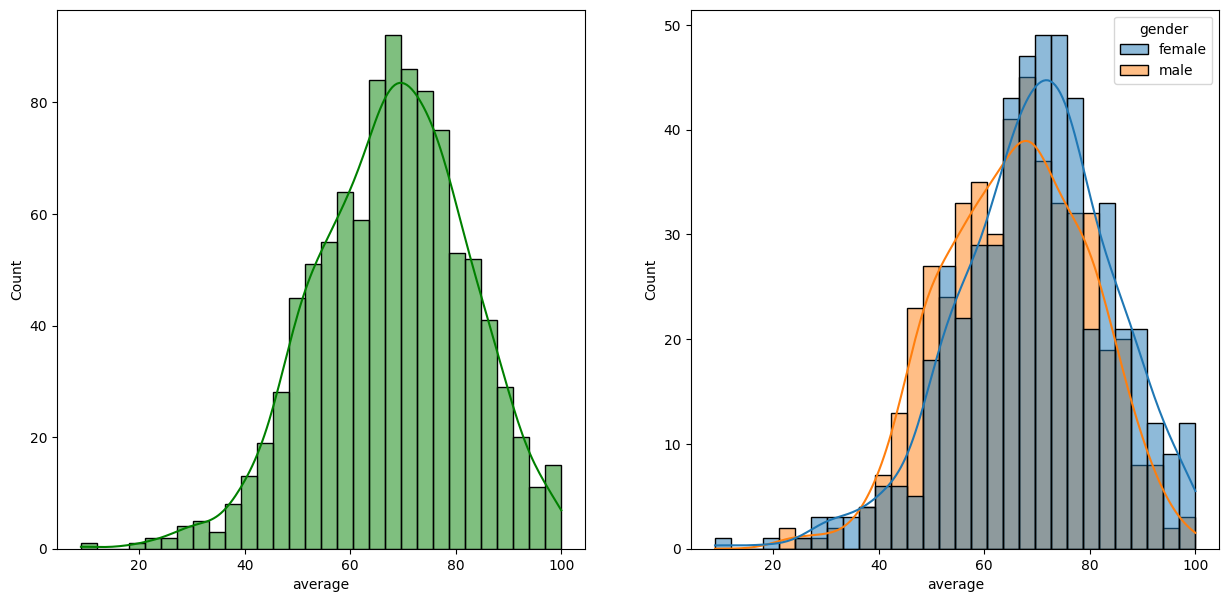

In [23]:
fig , axs =  plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()


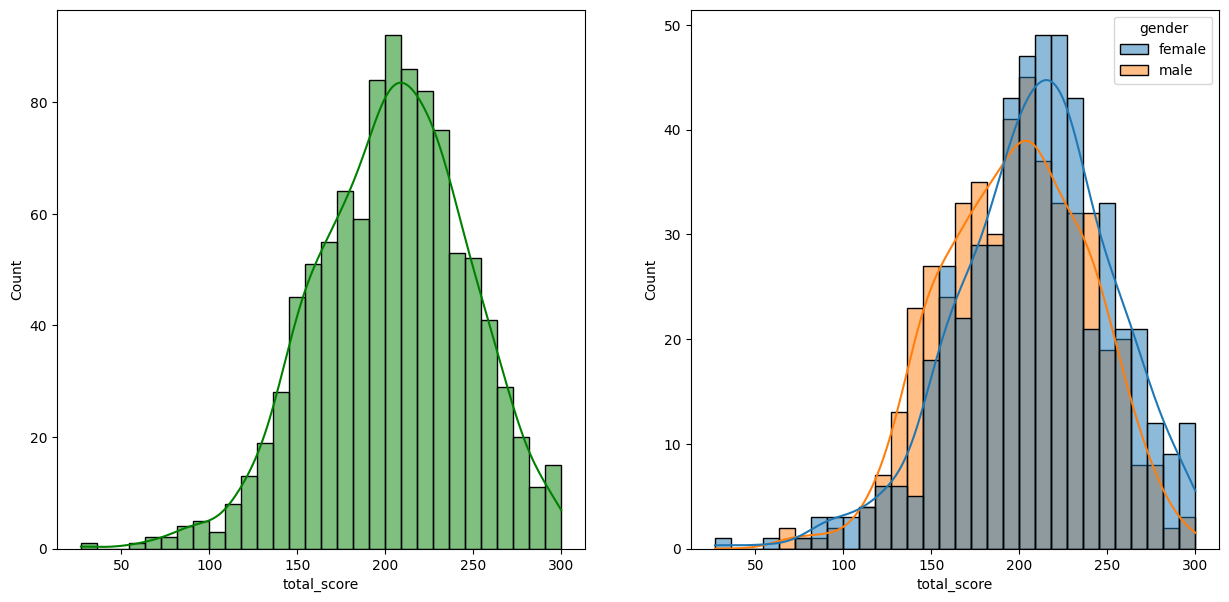

In [24]:
fig , axs =  plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')
plt.show()

insights

female students tend to perform well than male students

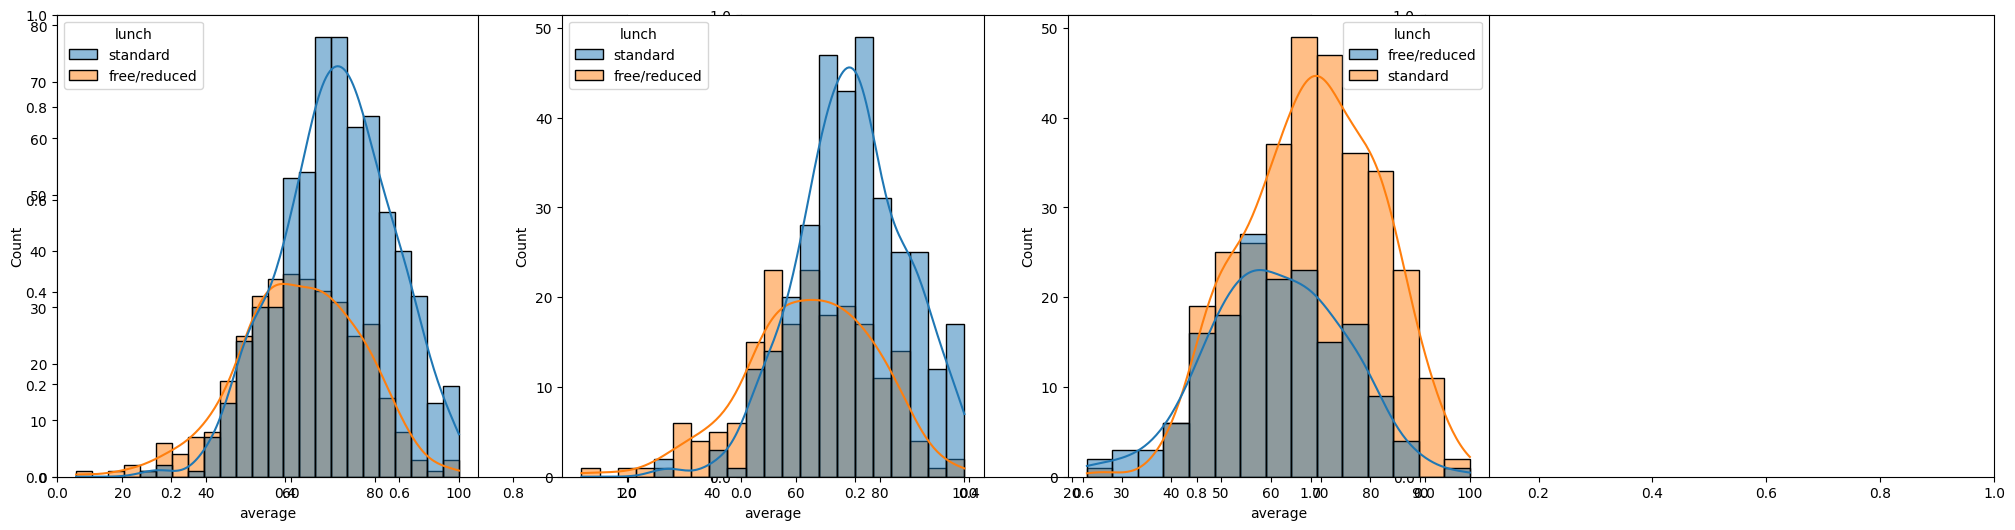

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='lunch')
plt.show()